In [ ]:
#install if not already
#!pip install beautifulsoup4

In [1]:
# import the library
%matplotlib inline

from urllib.request import urlopen
from urllib.error import HTTPError
from urllib.error import URLError
from bs4 import BeautifulSoup
import urllib
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Functions

####  getLikes(url) -> Takes url. Loads page and extracts likes. Returns number of likes

In [2]:
def getLikes(url):
    # Takes url. Loads page and extracts likes. Returns number of likes
    try:
        #load website & parse with bs4
        page = urllib.request.urlopen(url)
        soup = BeautifulSoup(page,'html.parser')
    except URLError as e:
        print(e)
        
    # get likes with unclicked tag
    try:
        likes = soup.find_all('button',class_='like-button-renderer-like-button-unclicked')
        try:
#             print('%s likes found for %s ' %(likes[0].text, url))
            numLikes = likes[0].text.replace(',', '') #remove thosand-comma Ex.1,300
            return pd.to_numeric(numLikes)
        except Exception:
            print("Broken link for %s" % url)
            
    except HTTPError as e:
        print(e)
        return '0'

#### keepTally(df) - -> Create new column and getLikes and Save to CSV

In [3]:
def keepTally(df):
    # Takes a df (teamName, url). Returns df + new column (name = timeRun) with scrapped likes
    
    fieldName = dt.datetime.now().strftime("%y-%m-%d.%H:%M")
    print("New field: ", fieldName)
    
    # apply getLikes to df
    df[fieldName] = df['url'].apply( lambda x : getLikes(x))
    print("Getting likes: complete")
    
    # sort by # votes from last scrape and save to csv
    df = df.sort_values(by= fieldName, ascending=False)
    df.to_csv("videoLikesTracker.csv", header=True, index=False)
    print("Save to csve fie 'videoLikesTracker.csv'")
    
    return "Tracker updated!"

##  Create teams df and first run (ONLY THE 1st TIME)

####  Load teams info a df

In [20]:
# tracker = pd.read_csv("teamsInfo.csv")
# len(tracker)

69

# Regular runs start HERE

##  Load from csv to a df and keepTally(df)
- tracker ("videoLikesTracker.csv") will get a new column added with the latest likes count
- *NOTE skick this step on the 1st Run (data loaded from teamsInfo.csv)

In [4]:
tracker = pd.read_csv("videoLikesTracker.csv")

## Go get me the likes for all teams!

In [5]:
keepTally(tracker)
tracker.head()

New field:  18-05-17.15:21
19,787 likes found for https://www.youtube.com/watch?v=AmyVmUzp5WQ 
17,122 likes found for https://www.youtube.com/watch?v=Zxhj9Z-PnOw 
16,466 likes found for https://www.youtube.com/watch?v=3kJvpq8pcsY 
16,819 likes found for https://www.youtube.com/watch?v=enTh04mX5FQ 
17,755 likes found for https://www.youtube.com/watch?v=IHJxo53wNvo 
14,378 likes found for https://www.youtube.com/watch?v=7FaHxxnmiZs 
 likes found for https://www.youtube.com/watch?v=zDcbONtnpcA 
14,537 likes found for https://www.youtube.com/watch?v=-Mtxx3IEZLc 
28,129 likes found for https://www.youtube.com/watch?v=fJJneJJgzwo 
12,676 likes found for https://www.youtube.com/watch?v=itZ4blsBIDU 
15,931 likes found for https://www.youtube.com/watch?v=cyL6khy7ipI 
13,701 likes found for https://www.youtube.com/watch?v=WuYEgOpRlPU 
10,444 likes found for https://www.youtube.com/watch?v=NcZZgCa809U 
10,064 likes found for https://www.youtube.com/watch?v=_aizBkuaXLM 
5,266 likes found for https

,team,url,18-05-16.10:05,18-05-16.11:03,18-05-16.11:31,18-05-16.12:05,18-05-17.15:21
0,YouRoot.io,https://www.youtube.com/watch?v=AmyVmUzp5WQ,16172,16664,17569,17765,19787.0
1,Loan-Block,https://www.youtube.com/watch?v=Zxhj9Z-PnOw,13267,14762,15480,16265,17122.0
2,Langchain,https://www.youtube.com/watch?v=3kJvpq8pcsY,12748,14134,14314,15219,16466.0
3,Armada,https://www.youtube.com/watch?v=enTh04mX5FQ,12610,13597,13748,15167,16819.0
4,Nooberly,https://www.youtube.com/watch?v=IHJxo53wNvo,13308,13309,13308,14636,17755.0


In [9]:
tracker = tracker.drop(columns='url')
tracker.head(15)

,team,18-05-16.10:05,18-05-16.11:03,18-05-16.11:31,18-05-16.12:05,18-05-17.15:21
0,YouRoot.io,16172,16664,17569,17765,19787.0
1,Loan-Block,13267,14762,15480,16265,17122.0
2,Langchain,12748,14134,14314,15219,16466.0
3,Armada,12610,13597,13748,15167,16819.0
4,Nooberly,13308,13309,13308,14636,17755.0
5,Smartz,13224,14086,14174,14182,14378.0
6,Serial Coders,10976,12767,13382,13825,NaN
7,DAO Axis,11240,12110,13065,13689,14537.0
8,Team Decentralize,10106,10106,11930,12692,28129.0
9,CollectiveHealth,12682,12682,12681,12689,12676.0


# Results

####  Top 15 teams

In [141]:
lastVote = 'likes'
tracker.columns = ['team','url', '1:30', '0:49', '0:29', lastVote]
tracker[['team', lastVote]]

,team,likes
0,YouRoot.io,17765
1,Loan-Block,16265
2,Langchain,15219
3,Smartz,14182
4,Armada,15167
5,Serial Coders,13825
6,Nooberly,14636
7,DAO Axis,13689
8,CollectiveHealth,12689
9,Team Decentralize,12692


#### Show everyone ... after all, everybody wins XD

In [118]:
with pd.option_context('display.max_rows', None):
    tracker[['team', lastVote]]

In [119]:
pd.set_option('display.max_rows', None)
tracker[['team', lastVote]]

,team,likes
0,YouRoot.io,17765
1,Loan-Block,16265
2,Langchain,15219
3,Smartz,14182
4,Armada,15167
5,Serial Coders,13825
6,Nooberly,14636
7,DAO Axis,13689
8,CollectiveHealth,12689
9,Team Decentralize,12692


#### Likes to int

In [110]:
tracker = tracker[np.isfinite(tracker.likes)]
# len(tracker)
tracker.likes = tracker.likes.astype(int)
#df.a = df.a.astype

#### top 10 TIMELINE

In [ ]:
# tracker['newLikes'] = tracker[lastVote].apply( lambda x : getLikes(x))

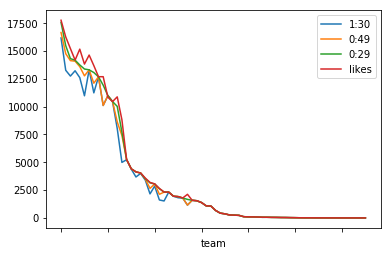

In [152]:
# tracker[lastVote].head(10).plot(kind='line')
# df.loc[df['column_name'] == some_value]
#df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]

tracker.groupby('likes').head(10).set_index('team').plot()

In [142]:
tracker.sort_values('likes').head(10)

,team,url,1:30,0:49,0:29,likes
65,Paramnesia,https://www.youtube.com/watch?v=2xBDxqopZDY,0.0,0.0,0.0,0
64,EosBusiness.io,https://www.youtube.com/watch?v=o0Sj03Krq44,0.0,0.0,0.0,0
62,BUTTON Wallet,https://www.youtube.com/watch?v=AXijIqYwuoU,1.0,1.0,1.0,1
61,CleanIt,https://www.youtube.com/watch?v=NnsyqVCWWWo,1.0,1.0,1.0,1
60,UMKA Planet,https://www.youtube.com/watch?v=GPNkxGlr--Q,1.0,1.0,1.0,1
63,MapChain,https://www.youtube.com/watch?v=Wc16hqBz8jY,1.0,1.0,1.0,1
59,Digital Credit,https://www.youtube.com/watch?v=Zm5Q2-LKTP0,2.0,2.0,2.0,2
58,BeScouted,https://www.youtube.com/watch?v=uxCUWwXXbTU,2.0,2.0,2.0,2
57,EOSREAL,https://www.youtube.com/watch?v=E-VgWUjiOZc,3.0,3.0,3.0,3
56,CoArt,https://www.youtube.com/watch?v=FXeO9ZomKps,4.0,4.0,4.0,4


#### PLOT all teams

In [136]:
plt.figure(figsize=(16,6))
tracker.set_index('team')
plt.plot(tracker[lastVote],kind='hist')

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

In [135]:
# plt.hist(tracker[lastVote], 50, density=True, facecolor='g', alpha=0.75)